# DATABASE ANALYSIS USING A DAILY AGGREGATE TABLE

## Database info

**About the database/project:**<br>
This Database has information about a company that rents movie DVDs.<br>
In this project, the database was queried to obtain an aggregate table by the rental date, to gain an understanding of:
- The performance of the two stores based on the number of rentals and customers in each.
- The customer's rental behaviour based on their demographic information and rental history.
- The patterns in movie rentals based on most and least rented categories.<br>

For furthur understaning, the public schema for the DVD Rental database was used as given in the *Diagram.pdf*.

## Importing necessary libraries and modules

In [1]:
# importing functions from local module:
from database_handler import create_connection, return_query_as_df, close_connection

# importing pyplot sub-module to visualize our data easily:
import matplotlib.pyplot as plt
import pandas as pd

## Connecting to the database

We need to create a session to work with, we do that using the function we defined beforehand:

In [2]:
session = create_connection()

A glimpse of our aggregate table:

In [3]:
agg_table = """
    SELECT * FROM ola_reporting_schema.agg_daily
"""
df = return_query_as_df(db_session = session, query = agg_table)
df.head()

c:\Users\olasm\Desktop\FSD - July 2023\week 4\Ola_Smeha_proj\database_handler.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  query_df = pd.read_sql_query(sql= query, con=db_session)


,rental_date,late_returns_perc,total_store1_rentals,total_store2_rentals,total_store1_customers,total_store2_customers,active_cust_store1_perc,active_cust_store2_perc,total_india_customers,total_united_kingdom_customers,total_sports_rentals,total_animation_rentals,total_travel_rentals,total_music_rentals,total_pg13_rentals,total_nc17_rentals,total_g_rentals,total_pg_rentals,total_r_rentals
0,2005-05-24,50.00,4,4,5,3,100.0,100.00,0,0,0,1,0,1,1,2,3,0,2
1,2005-05-25,47.45,68,69,77,52,98.7,96.15,10,1,6,13,12,8,42,22,25,24,24
2,2005-05-26,45.40,91,83,87,68,97.7,98.53,17,2,15,9,11,7,33,45,27,29,40
3,2005-05-27,50.60,67,99,79,71,100.0,95.77,18,1,11,11,7,11,43,34,27,32,30
4,2005-05-28,54.08,114,82,91,75,98.9,93.33,13,2,12,8,5,8,51,35,40,29,41


We won't be using this dataframe, instead we will be working with queries using this aggregate table as seperate dataframes and plotting them dates.

# Aggregated Data Analysis

## Percentage of late returns:

In [4]:
# Retrieving necessary columns
perc_late_returns = """
    SELECT
        daily_agg.rental_date,
        daily_agg.late_returns_perc
    FROM ola_reporting_schema.agg_daily AS daily_agg
"""
df_perc = return_query_as_df(db_session = session, query = perc_late_returns)

c:\Users\olasm\Desktop\FSD - July 2023\week 4\Ola_Smeha_proj\database_handler.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  query_df = pd.read_sql_query(sql= query, con=db_session)


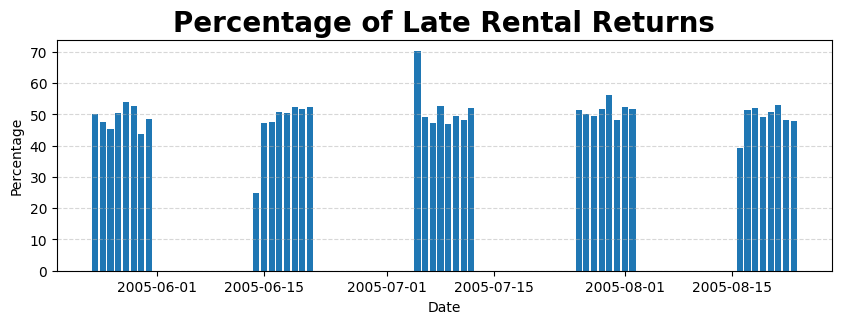

In [5]:
#Plotting
plt.figure(figsize=(10,3))
plt.title('Percentage of Late Rental Returns',fontdict={'fontweight':'bold', 'fontsize': 20})
plt.xlabel('Date')
plt.ylabel('Percentage')
x = df_perc['rental_date'][:40]
y = df_perc['late_returns_perc'][:40]
plt.bar(x,y)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

## Average Rentals per Store

In [6]:
total_rentals_per_store = """
    SELECT
        AVG(daily_agg.total_store1_rentals) AS total_store1_rentals,
        AVG(daily_agg.total_store2_rentals) AS total_store2_rentals
    FROM ola_reporting_schema.agg_daily AS daily_agg
"""
df_total_rentals_per_store = return_query_as_df(db_session = session, query = total_rentals_per_store)

c:\Users\olasm\Desktop\FSD - July 2023\week 4\Ola_Smeha_proj\database_handler.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  query_df = pd.read_sql_query(sql= query, con=db_session)


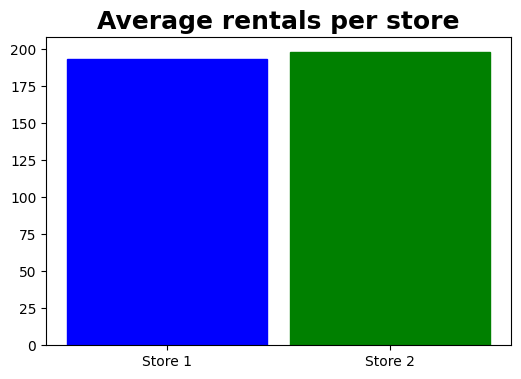

In [7]:
plt.figure(figsize = (6,4))
values = [
        df_total_rentals_per_store['total_store1_rentals'][0],
        df_total_rentals_per_store['total_store2_rentals'][0]
        ]
labels = ['Store 1', 'Store 2']
colors = ['blue','green']
bars = plt.bar(labels,values, width=0.9)
for bar in bars:
    bar.set_color(colors.pop(0))
plt.title('Average rentals per store',fontdict={'fontweight':'bold', 'fontsize': 18})
plt.show()

## Total Customers per Store on Each Rental Day

In [8]:
total_customers = """
    SELECT
        daily_agg.rental_date,
        daily_agg.total_store1_customers,
        daily_agg.total_store2_customers
    FROM ola_reporting_schema.agg_daily AS daily_agg
"""
df_total_customers = return_query_as_df(db_session=session, query = total_customers)
#df_total_customers = df_total_customers[:40]

c:\Users\olasm\Desktop\FSD - July 2023\week 4\Ola_Smeha_proj\database_handler.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  query_df = pd.read_sql_query(sql= query, con=db_session)


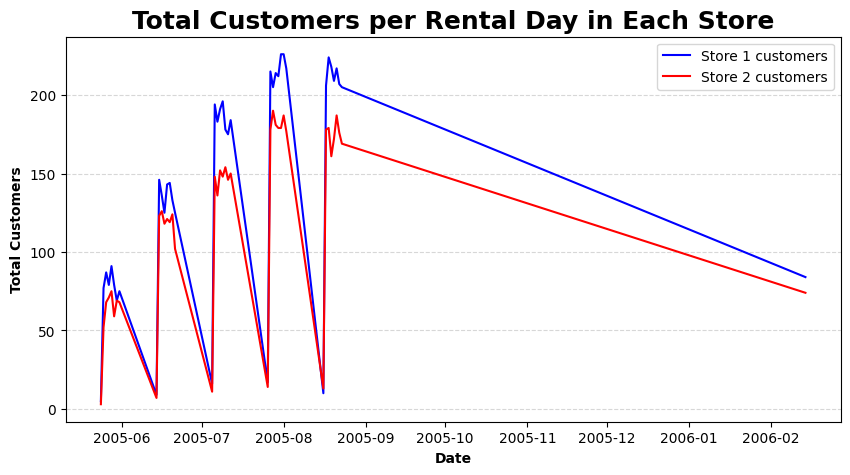

In [9]:
plt.figure(figsize=(10,5))
plt.title('Total Customers per Rental Day in Each Store', fontdict={'fontweight':'bold', 'fontsize': 18})
plt.plot(df_total_customers['rental_date'], df_total_customers['total_store1_customers'],'b-',label='Store 1 customers')
plt.plot(df_total_customers['rental_date'], df_total_customers['total_store2_customers'],'r-',label='Store 2 customers')
plt.xlabel('Date',fontweight = 'bold')
plt.ylabel('Total Customers', fontweight = 'bold')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

## Customer Behavior from Two Countries

In [10]:

total_customers_per_country = """
    SELECT
        daily_agg.rental_date,
        daily_agg.total_india_customers,
        daily_agg.total_united_kingdom_customers
    FROM ola_reporting_schema.agg_daily AS daily_agg
"""
df_top3_countries_customers = return_query_as_df(db_session=session, query = total_customers_per_country)
#df_top3_countries_customers = df_top3_countries_customers[:40]

c:\Users\olasm\Desktop\FSD - July 2023\week 4\Ola_Smeha_proj\database_handler.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  query_df = pd.read_sql_query(sql= query, con=db_session)


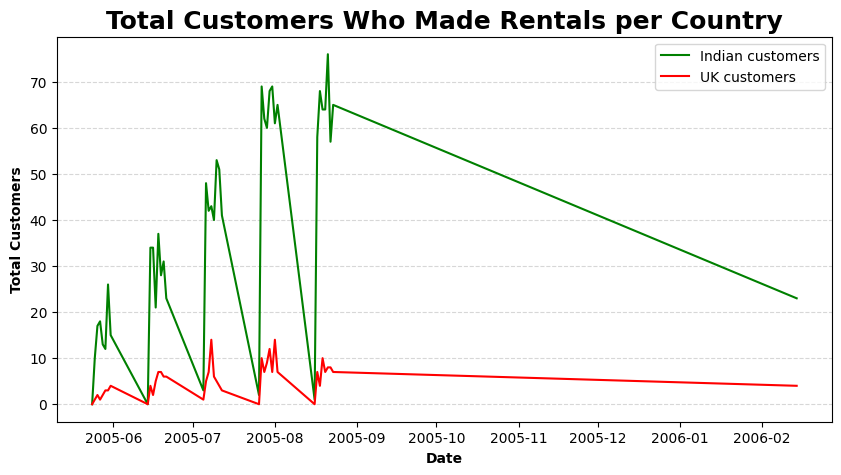

In [11]:
plt.figure(figsize=(10,5))
plt.title('Total Customers Who Made Rentals per Country', fontdict={'fontweight':'bold', 'fontsize': 18})
plt.plot(df_top3_countries_customers['rental_date'], df_top3_countries_customers['total_india_customers'],'g-',label='Indian customers')
plt.plot(df_top3_countries_customers['rental_date'], df_top3_countries_customers['total_united_kingdom_customers'],'r-',label='UK customers')
plt.xlabel('Date',fontweight = 'bold')
plt.ylabel('Total Customers', fontweight = 'bold')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

## Total Rentals of the Two Most and Least Rented Categories

In [12]:
categories = """
    SELECT
        SUM(daily_agg.total_sports_rentals) AS total_sports_rentals,
        SUM(daily_agg.total_animation_rentals) AS total_animation_rentals,
        SUM(daily_agg.total_travel_rentals) AS total_travel_rentals,
        SUM(daily_agg.total_music_rentals) AS total_music_rentals
    FROM ola_reporting_schema.agg_daily AS daily_agg
"""
df_top3_countries_customers = return_query_as_df(db_session=session, query = categories)

c:\Users\olasm\Desktop\FSD - July 2023\week 4\Ola_Smeha_proj\database_handler.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  query_df = pd.read_sql_query(sql= query, con=db_session)


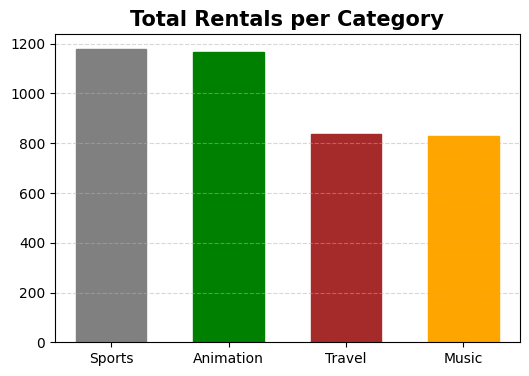

In [13]:
plt.figure(figsize = (6,4))
labels = ['Sports', 'Animation', 'Travel', 'Music']
values = [
        df_top3_countries_customers.total_sports_rentals[0],
        df_top3_countries_customers.total_animation_rentals[0],
        df_top3_countries_customers.total_travel_rentals[0],
        df_top3_countries_customers.total_music_rentals[0]]
colors = ['grey','green','brown','orange']
bars = plt.bar(labels,values, width=0.6)
for bar in bars:
    bar.set_color(colors.pop(0))
plt.title('Total Rentals per Category',fontdict={'fontweight':'bold', 'fontsize': 15})
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# MORE ON THE MATTER

## Demographic Analysis

In [15]:
# Retrieving first 15 countries with the total customers in each from view
countries = """
    SELECT *
    FROM ola_reporting_schema.view_customers_who_rented_15countries
"""
# Retrieving store locations from view
stores = """
    SELECT *
    FROM ola_reporting_schema.view_store_locations
"""
df_countries_customers = return_query_as_df(db_session=session, query = countries)
df_store_locations = return_query_as_df(db_session=session, query = stores)

c:\Users\olasm\Desktop\FSD - July 2023\week 4\Ola_Smeha_proj\database_handler.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  query_df = pd.read_sql_query(sql= query, con=db_session)
c:\Users\olasm\Desktop\FSD - July 2023\week 4\Ola_Smeha_proj\database_handler.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  query_df = pd.read_sql_query(sql= query, con=db_session)


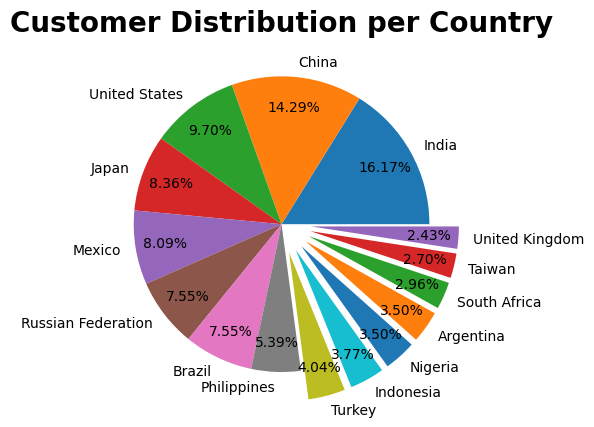

In [16]:
plt.figure()
x = list(df_countries_customers['country'])
y = list(df_countries_customers['total_customers'])
explode = (0,0,0,0,0,0,0,0,.2,.2,.2,.2,.2,.2,.2)
plt.pie(y,labels=x, pctdistance=0.8, autopct='%.2f%%', explode=explode)
plt.title('Customer Distribution per Country', fontdict={'fontweight':'bold', 'fontsize': 20})
plt.show()

The irony is, the stores are located in countries where almost none of the customers in the database live:

In [17]:
# Viewing Store Locations
df_store_locations

,store_id,country
0,1,Canada
1,2,Australia


## Rating Analysis

In [18]:
ratings = """
    SELECT
        SUM(daily_agg.total_pg13_rentals) AS total_pg13_rentals,
        SUM(daily_agg.total_nc17_rentals) AS total_nc17_rentals,
        SUM(daily_agg.total_g_rentals) AS total_g_rentals,
        SUM(daily_agg.total_pg_rentals) AS total_pg_rentals,
        SUM(daily_agg.total_r_rentals) AS total_r_rentals
    FROM ola_reporting_schema.agg_daily AS daily_agg
"""
df_rating = return_query_as_df(db_session=session, query = ratings)

c:\Users\olasm\Desktop\FSD - July 2023\week 4\Ola_Smeha_proj\database_handler.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  query_df = pd.read_sql_query(sql= query, con=db_session)


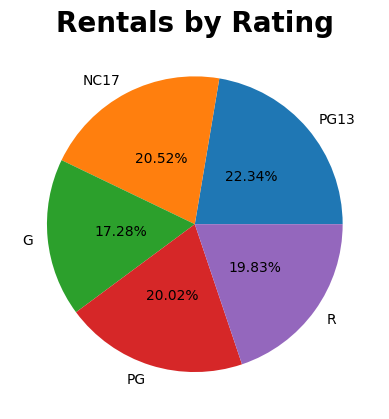

In [19]:
values = [
        df_rating['total_pg13_rentals'][0],
        df_rating['total_nc17_rentals'][0],
        df_rating['total_g_rentals'][0],
        df_rating['total_pg_rentals'][0],
        df_rating['total_r_rentals'][0]
        ]
labels = ['PG13', 'NC17', 'G', 'PG', 'R']
plt.pie(values,labels=labels, pctdistance=0.5, autopct='%.2f%%')
plt.title('Rentals by Rating',fontdict={'fontweight':'bold', 'fontsize': 20})
plt.show()

In [20]:
close_connection(db_session=session)